## Mengimport pustaka yang dibutuhkan

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline


##  Data Loading

In [182]:
df = pd.read_csv("dataset/rideshare_kaggle.csv")

In [183]:
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [184]:
df.shape

(693071, 57)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [186]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [187]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

## Data Cleaning

**Keterangan :** Mengisi data null pada label price dengan mean

In [188]:
df_not_null = df[['distance', 'cab_type', 'timestamp', 'destination', 'source','surge_multiplier', 'temperature', 'icon','name', 'price']]

In [189]:
df_not_null

,distance,cab_type,timestamp,destination,source,surge_multiplier,temperature,icon,name,price
0,0.44,Lyft,1.544953e+09,North Station,Haymarket Square,1.0,42.34,partly-cloudy-night,Shared,5.0
1,0.44,Lyft,1.543284e+09,North Station,Haymarket Square,1.0,43.58,rain,Lux,11.0
2,0.44,Lyft,1.543367e+09,North Station,Haymarket Square,1.0,38.33,clear-night,Lyft,7.0
3,0.44,Lyft,1.543554e+09,North Station,Haymarket Square,1.0,34.38,clear-night,Lux Black XL,26.0
4,0.44,Lyft,1.543463e+09,North Station,Haymarket Square,1.0,37.44,partly-cloudy-night,Lyft XL,9.0
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1.543708e+09,North End,West End,1.0,37.05,partly-cloudy-night,UberXL,13.0
693067,1.00,Uber,1.543708e+09,North End,West End,1.0,37.05,partly-cloudy-night,UberX,9.5
693068,1.00,Uber,1.543708e+09,North End,West End,1.0,37.05,partly-cloudy-night,Taxi,NaN
693069,1.00,Uber,1.543708e+09,North End,West End,1.0,37.05,partly-cloudy-night,Black SUV,27.0


In [190]:
df_not_null['price'].fillna(df_not_null['price'].mean(), inplace=True)

C:\Users\umam1\AppData\Local\Temp\ipykernel_25056\552665269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_null['price'].fillna(df_not_null['price'].mean(), inplace=True)


In [191]:
df_not_null.isnull().sum()

distance            0
cab_type            0
timestamp           0
destination         0
source              0
surge_multiplier    0
temperature         0
icon                0
name                0
price               0
dtype: int64

In [192]:
df_not_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   timestamp         693071 non-null  float64
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   surge_multiplier  693071 non-null  float64
 6   temperature       693071 non-null  float64
 7   icon              693071 non-null  object 
 8   name              693071 non-null  object 
 9   price             693071 non-null  float64
dtypes: float64(5), object(5)
memory usage: 52.9+ MB


In [193]:
df_not_null = df_not_null.rename(columns={"icon":"weather"})

## Explorasi Data

<AxesSubplot:xlabel='price', ylabel='name'>

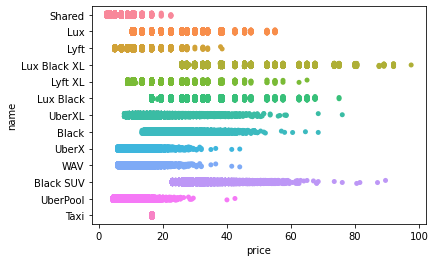

In [194]:
sns.stripplot(data=df_not_null, x='price', y='name')

**Keterangan :** Tipe angkutan Lux Black XL mengenakan ongkos yang mahal dibandingkan semua tipe angkutan sedangkan share dan taxi mengenakan ongkos yang murah dibandingkan semua tipe angkutan

<AxesSubplot:xlabel='price', ylabel='weather'>

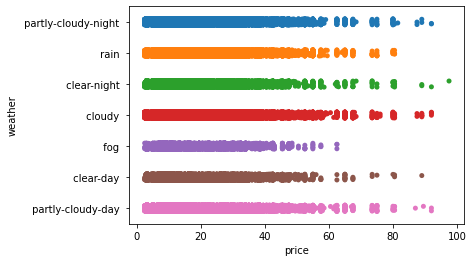

In [195]:
sns.stripplot(data=df_not_null, x='price', y='weather')

**Keterangan :** pada saat cuaca sedang berkabut harga angkutan murah dan pada saat malam hari harga angkutan menjadi lebih mahal

<AxesSubplot:>

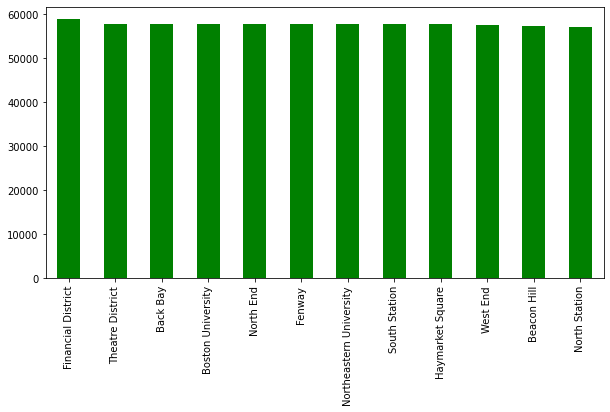

In [196]:
df_not_null['source'].value_counts().plot(kind='bar', figsize=(10,5), color='green')

<AxesSubplot:>

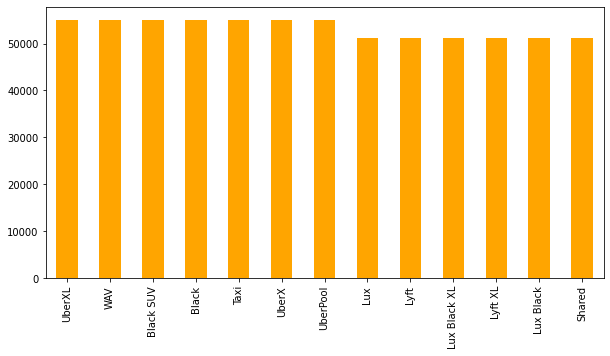

In [197]:
df_not_null['name'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')

<AxesSubplot:>

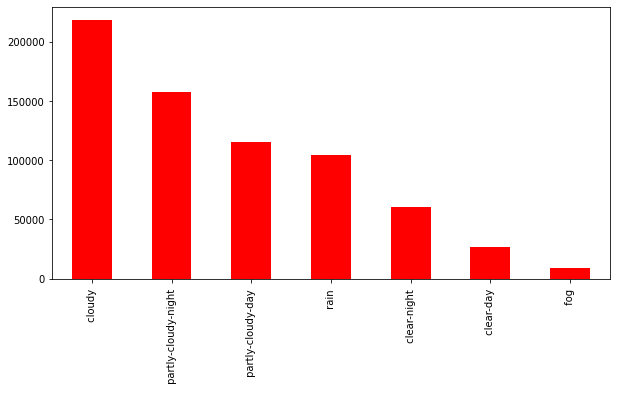

In [198]:
df_not_null['weather'].value_counts().plot(kind='bar', figsize=(10,5), color='red')

**Keterangan :** Orang-orang paling sering menggunakan taxi online pada saat cuaca berawan sedangkan pada saat berakbut orang jarang menggunakannya

<AxesSubplot:>

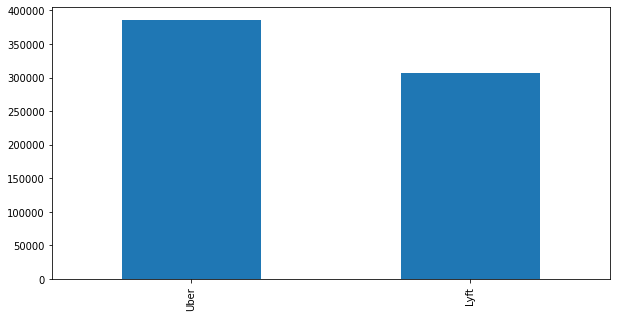

In [199]:
df_not_null['cab_type'].value_counts().plot(kind='bar', figsize=(10,5))

In [200]:
uber_df = df_not_null[df_not_null['cab_type'] =="Uber"]
lyft_df = df_not_null[df_not_null['cab_type'] =="Lyft"]

In [201]:
uber_df_corr = uber_df[["distance", "price", "surge_multiplier"]]
lyft_df_corr = lyft_df[["distance", "price", "surge_multiplier"]]

Kolerasi harga, jarak, dan surge multiplier **Lyft**

<AxesSubplot:>

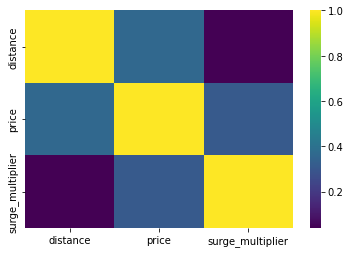

In [202]:
sns.heatmap(lyft_df_corr.corr() , cmap="viridis")

Kolerasi harga, jarak, dan surge multiplier **uber**

<AxesSubplot:>

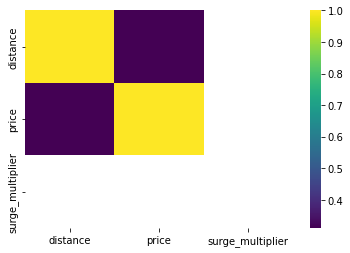

In [203]:
sns.heatmap(uber_df_corr.corr(), cmap="viridis")


**Keterangan :** 

- Untuk Lyft: pengganda lonjakan dan jarak berkorelasi lemah.

- Untuk Lyft: pengganda lonjakan dan harga lebih berkorelasi.

- Untuk Uber: harga dan jarak berkorelasi lemah.

In [204]:
uber_dis_price_surge = uber_df[['distance', 'surge_multiplier', 'price']]
lyft_dis_price_surge = lyft_df[['distance', 'surge_multiplier', 'price']]

Text(0.5, 1.0, 'Uber - Distance Vs Price')

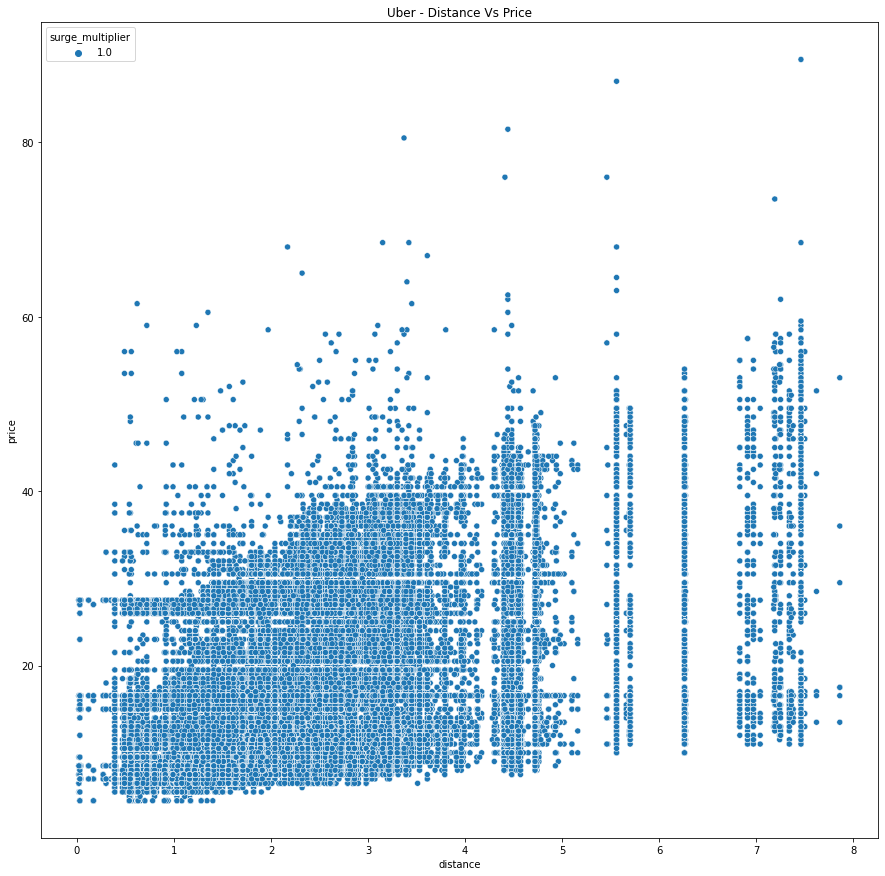

In [205]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=uber_dis_price_surge, x="distance", y="price", hue="surge_multiplier").set_title("Uber - Distance Vs Price")

Text(0.5, 1.0, 'Lyft - Distance Vs Price')

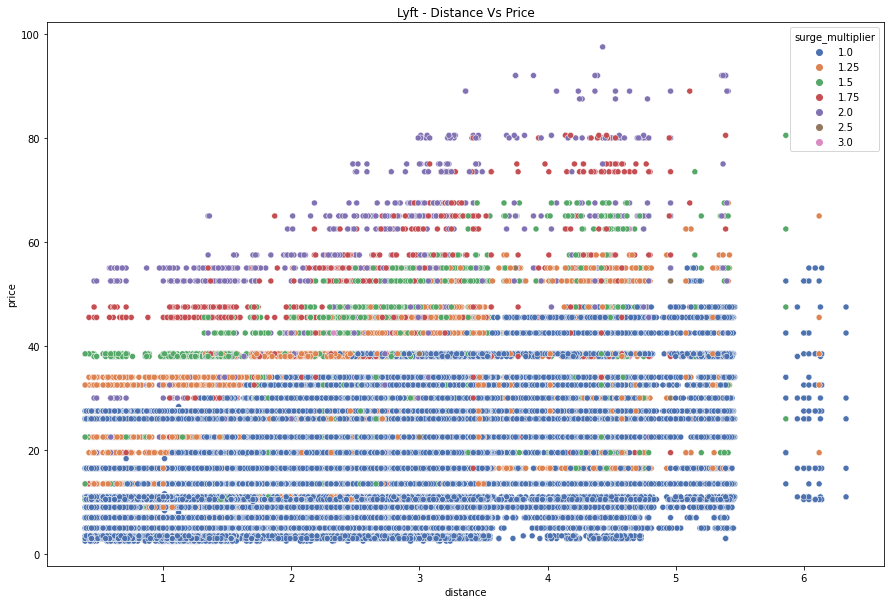

In [206]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=lyft_dis_price_surge, x="distance", y="price", hue="surge_multiplier", palette="deep").set_title("Lyft - Distance Vs Price")

**Keterangan :** Dari atas kita mengetahui bahwa jarak dan harga tidak berkorelasi kuat. Dengan bertambahnya jarak, harga tidak meningkat secara linier.

## Data Preprocessing

In [207]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()

**Encoding Data**

In [208]:
uber_df_fix = uber_df[['name', 'weather', 'distance', 'surge_multiplier', 'price']]

In [209]:
lyft_df_fix = lyft_df[['name', 'weather', 'distance', 'surge_multiplier', 'price']]

In [210]:
uber_df_fix['weather'] = label_encoder.fit_transform(uber_df_fix['weather'])
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


C:\Users\umam1\AppData\Local\Temp\ipykernel_25056\141731609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_df_fix['weather'] = label_encoder.fit_transform(uber_df_fix['weather'])


In [233]:
uber_df_fix['name'] = label_encoder.fit_transform(uber_df_fix['name'])
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Taxi --> 2
UberPool --> 3
UberX --> 4
UberXL --> 5
WAV --> 6


C:\Users\umam1\AppData\Local\Temp\ipykernel_25056\3837234901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_df_fix['name'] = label_encoder.fit_transform(uber_df_fix['name'])


In [234]:
lyft_df_fix['weather'] = label_encoder.fit_transform(lyft_df_fix['weather'])
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


C:\Users\umam1\AppData\Local\Temp\ipykernel_25056\3042774926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyft_df_fix['weather'] = label_encoder.fit_transform(lyft_df_fix['weather'])


In [235]:
lyft_df_fix['name'] = label_encoder.fit_transform(lyft_df_fix['name'])
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Lux --> 0
Lux Black --> 1
Lux Black XL --> 2
Lyft --> 3
Lyft XL --> 4
Shared --> 5


C:\Users\umam1\AppData\Local\Temp\ipykernel_25056\1211664814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyft_df_fix['name'] = label_encoder.fit_transform(lyft_df_fix['name'])


In [236]:
uber_df_fix.head()

,name,weather,distance,surge_multiplier,price
12,5,2,1.11,1.0,12.0
13,0,1,1.11,1.0,16.0
14,4,4,1.11,1.0,7.5
15,6,6,1.11,1.0,7.5
16,1,2,1.11,1.0,26.0


In [237]:
lyft_df_fix.head()

,name,weather,distance,surge_multiplier,price
0,5,5,0.44,1.0,5.0
1,0,6,0.44,1.0,11.0
2,3,1,0.44,1.0,7.0
3,2,1,0.44,1.0,26.0
4,4,5,0.44,1.0,9.0


In [238]:
uber_df_fix.describe()

,name,weather,distance,surge_multiplier,price
count,385663.000000,385663.000000,385663.000000,385663.0,385663.000000
mean,3.000005,3.472786,2.191386,1.0,15.902455
std,2.000018,1.797712,1.178973,0.0,7.929634
min,0.000000,0.000000,0.020000,1.0,4.500000
25%,1.000000,2.000000,1.300000,1.0,9.500000
50%,3.000000,4.000000,2.170000,1.0,15.000000
75%,5.000000,5.000000,2.840000,1.0,19.000000
max,6.000000,6.000000,7.860000,1.0,89.500000


In [239]:
lyft_df_fix.describe()

,name,weather,distance,surge_multiplier,price
count,307408.000000,307408.000000,307408.000000,307408.00000,307408.000000
mean,2.499984,3.464585,2.186976,1.03127,17.351396
std,1.707822,1.795623,1.086622,0.13561,10.019171
min,0.000000,0.000000,0.390000,1.00000,2.500000
25%,1.000000,2.000000,1.270000,1.00000,9.000000
50%,2.000000,4.000000,2.140000,1.00000,16.500000
75%,4.000000,5.000000,2.970000,1.00000,22.500000
max,5.000000,6.000000,6.330000,3.00000,97.500000


In [240]:
x_0 = lyft_df_fix.drop('price', axis=1)
y_0 = lyft_df_fix[['price']].values.reshape(-1,1)


In [241]:
data_lyft = X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(x_0, y_0, test_size=0.3)

print("Shape Training Feature:", X_train_0.shape)
print("Shape Testing Feature:", X_test_0.shape)
print("Shape Training Feature:", y_train_0.shape)
print("Shape Testing Feature:", y_test_0.shape)

Shape Training Feature: (215185, 4)
Shape Testing Feature: (92223, 4)
Shape Training Feature: (215185, 1)
Shape Testing Feature: (92223, 1)


In [242]:
x_1 = uber_df_fix.drop('price', axis=1)
y_1 = uber_df_fix[['price']].values.reshape(-1,1)

In [243]:
data_uber = X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.3)

print("Shape Training Feature:", X_train_1.shape)
print("Shape Testing Feature:", X_test_1.shape)
print("Shape Training Feature:", y_train_1.shape)
print("Shape Testing Feature:", y_test_1.shape)

Shape Training Feature: (269964, 4)
Shape Testing Feature: (115699, 4)
Shape Training Feature: (269964, 1)
Shape Testing Feature: (115699, 1)


In [244]:
regr_0 = LinearRegression()
regr_0.fit(X_train_0, y_train_0)

regr_1 = LinearRegression()
regr_1.fit(X_train_1, y_train_1)

LinearRegression()

In [245]:
print("Lyft :")
print('Cofficients (b) : ', regr_0.coef_)
print('Intercept (a) : ', regr_0.intercept_)

print("\nUber :")
print('Cofficients (b) : ', regr_1.coef_)
print('Intercept (a) : ', regr_1.intercept_)

Lyft :
Cofficients (b) :  [[-2.88650486e+00  2.16226771e-03  3.23904411e+00  1.91262276e+01]]
Intercept (a) :  [-2.26223577]

Uber :
Cofficients (b) :  [[-2.44026534  0.00831366  2.10417714  0.        ]]
Intercept (a) :  [18.58909232]


In [246]:
regr_0.score(X_test_0, y_test_0)

0.4630214051943482

In [247]:
regr_1.score(X_test_1, y_test_1)

0.471650069725279

In [248]:
ypred_0 = regr_0.predict(X_test_0)

In [249]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("r2 Score : ", r2_score(y_test_0, ypred_0))
print("MAE Score : ", mean_absolute_error(y_test_0, ypred_0))
print("RMSE Score : ", np.sqrt(mean_squared_error(y_test_0, ypred_0)))

r2 Score :  0.4630214051943482
MAE Score :  5.806608300839207
RMSE Score :  7.376533063638963


In [250]:
ypred_1 = regr_1.predict(X_test_1)

In [251]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("r2 Score : ", r2_score(y_test_1, ypred_1))
print("MAE Score : ", mean_absolute_error(y_test_1, ypred_1))
print("RMSE Score : ", np.sqrt(mean_squared_error(y_test_1, ypred_1)))

r2 Score :  0.471650069725279
MAE Score :  4.633448529546015
RMSE Score :  5.748930264277659


In [256]:
xtest = [[1,2,5,1.25]]
df_test = pd.DataFrame(xtest, columns=[['name', 'weather','distance','surge_multiplier']])
pred_0 = regr_0.predict(df_test)
pred_1 = regr_1.predict(df_test)

C:\Users\umam1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\umam1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\umam1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\umam1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [257]:
print("Prediksi harga Lyft : ", pred_0 ) 
print("Prediksi harga Uber : ", pred_1 ) 

Prediksi harga Lyft :  [[34.95858893]]
Prediksi harga Uber :  [[26.68633998]]


In [254]:
import joblib
joblib.dump(regr_0, "lyft_model.pkl")

['lyft_model.pkl']

In [255]:
joblib.dump(regr_1, "uber_model.pkl")

['uber_model.pkl']